# Домашнее задание по теме «Ансамблирование»



## Задание

#### Цель: применить на практике базовые ансамблевые методы
#### Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Этапы работы:

### 1. Получите данные и загрузите их в рабочую среду

In [173]:
my_path = r"C:\Users\sveta\Documents\Netology\ML\heart.csv"
data = pd.read_csv(my_path)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Attribute Information:
    
- Age: возраст пациента [лет]
- Sex: пол пациента [M: Male, F: Female]
- ChestPainType: тип боли в груди [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: артериальное давление в состоянии покоя [mm Hg]
- Cholesterol: сывороточный холестерин [mm/dl]
- FastingBS: уровень сахара в крови натощак [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: результаты электрокардиограммы в покое [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: максимальная достигнутая частота сердечных сокращений [Numeric value between 60 and 202]
- ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

### 2. Подготовьте датасет к обучению моделей.

#### a) Категориальные переменные переведите в цифровые значения

In [175]:
categorials = data.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [176]:
dummy_data = pd.get_dummies(data, columns=categorials, drop_first= True)
dummy_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


#### b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

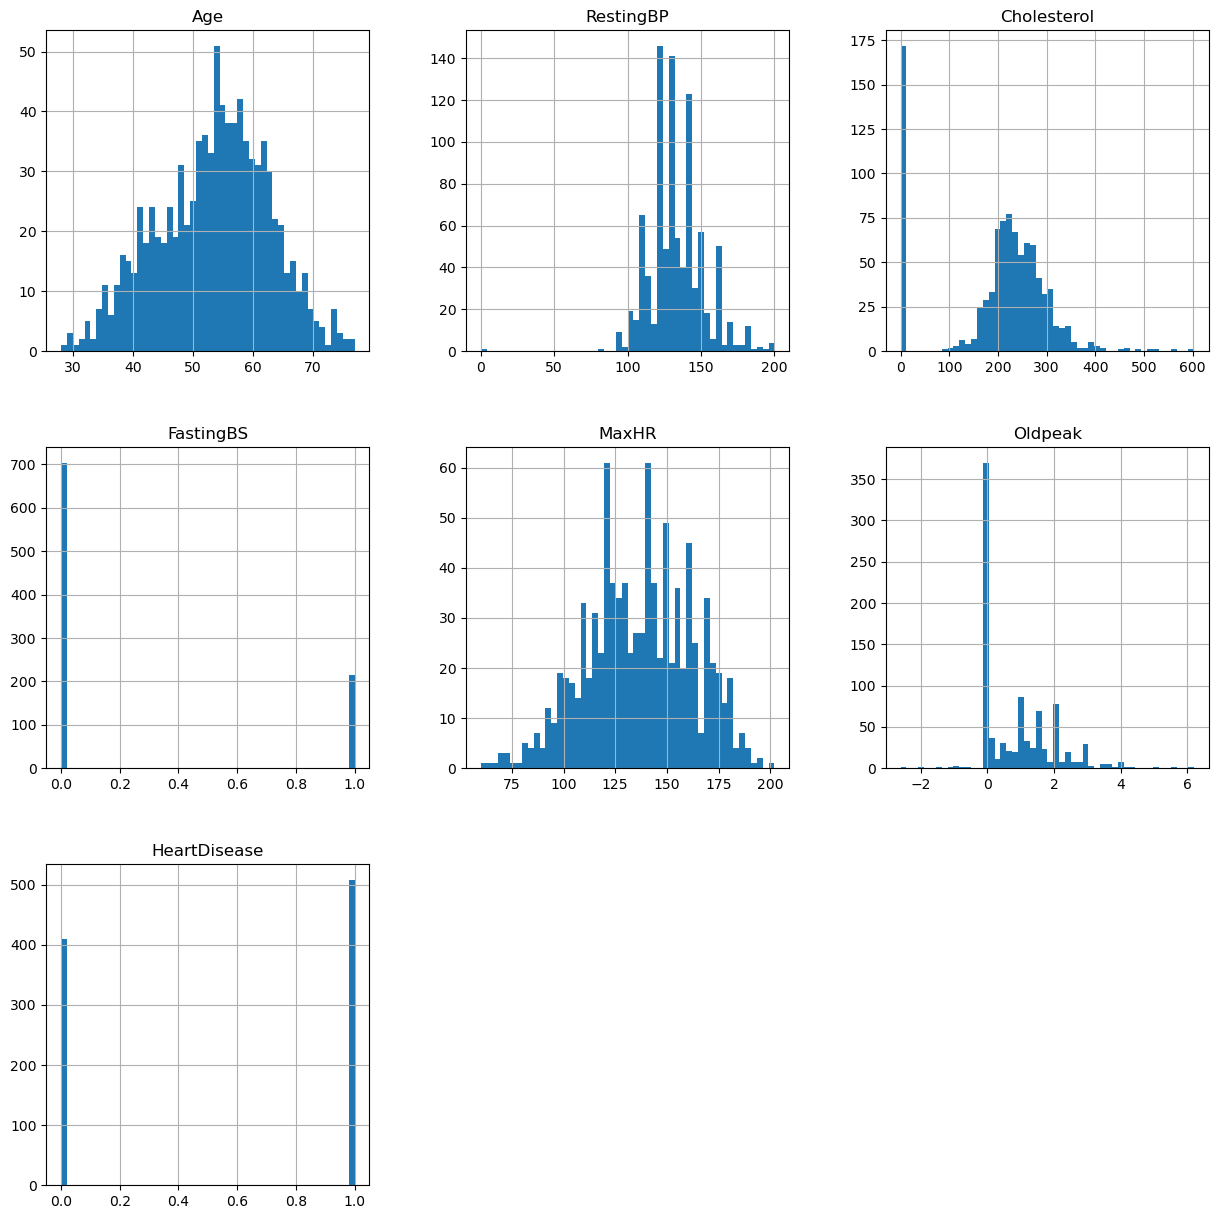

In [177]:
integer = data.select_dtypes(['int', 'float']).columns.tolist()
data[integer].hist(figsize=(15, 15), bins=50)

In [178]:
pear_corr=dummy_data.corr(method='pearson')
pear_corr.style.background_gradient(axis=0)  

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.215793,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.046153,-0.041348,0.049855,-0.116851,0.090447,0.155101,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092,0.150954,-0.006634,0.017365,-0.038470,-0.133106,-0.034166,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.060451,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.370425,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.408752,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.401924,-0.212964,-0.054790,-0.091580,0.102527,0.494282,0.554134,-0.622164
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.190664,0.116077,-0.150942
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.161522,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.300365,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.066486,-0.256767,1.000000,-0.122381,0.005010,-0.042236,-0.166030,-0.072031,0.093583


### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X = dummy_data.drop(columns=['HeartDisease'])
y = dummy_data[['HeartDisease']]

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

In [182]:
import warnings
warnings.filterwarnings('ignore')

#### a)

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
d_tree = DecisionTreeClassifier(random_state=41)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=41)

#### b)

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
d_forest = RandomForestClassifier(random_state=41)
d_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=41)

### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [187]:
from sklearn.metrics import classification_report

In [188]:
pred_tree = d_tree.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred_tree))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74        85
           1       0.78      0.74      0.76        99

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184



In [189]:
pred_forest = d_forest.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred_forest))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        85
           1       0.87      0.91      0.89        99

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [190]:
imp = pd.Series(d_forest.feature_importances_)
imp.index = pd.Series(X_train.columns)
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.174394
Oldpeak              0.116831
ST_Slope_Flat        0.113065
MaxHR                0.102188
Cholesterol          0.098639
ExerciseAngina_Y     0.096806
Age                  0.084151
RestingBP            0.070679
ChestPainType_ATA    0.034927
Sex_M                0.026545
FastingBS            0.024468
ChestPainType_NAP    0.019547
RestingECG_Normal    0.017843
RestingECG_ST        0.009974
ChestPainType_TA     0.009942
dtype: float64

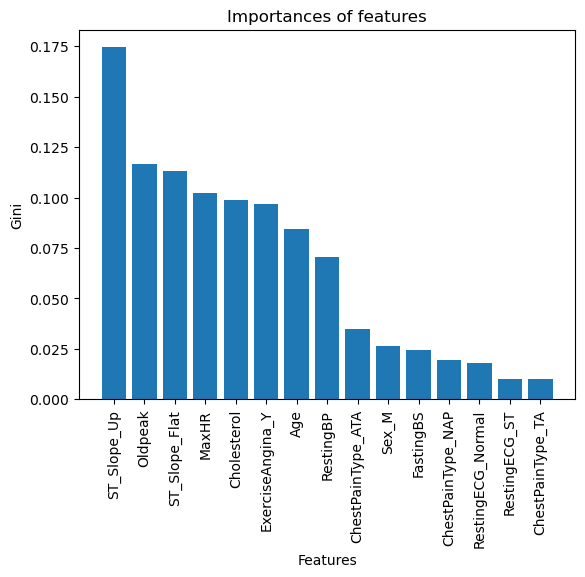

In [191]:
plt.title('Importances of features')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.index, imp)
plt.xticks(imp.index, rotation='vertical')
plt.show()

### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

In [192]:
from sklearn.ensemble import BaggingClassifier

In [193]:
bagging_tree = BaggingClassifier(d_tree)

In [194]:
bagging_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=41))

#### a) Повторите п. 5

In [195]:
pred_bag_tree = bagging_tree.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred_bag_tree))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        85
           1       0.86      0.84      0.85        99

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
*LinearSVC - метод опорных векторов*

In [196]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeCV

In [197]:
st_class= [
    ('dtc', d_tree),
    ('rfc', d_forest),
    ('svm', LinearSVC(random_state=42))
]

In [198]:
clf = StackingClassifier(
     estimators=st_class, final_estimator=LinearSVC()
 )

In [199]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=41)),
                               ('rfc', RandomForestClassifier(random_state=41)),
                               ('svm', LinearSVC(random_state=42))],
                   final_estimator=LinearSVC())

pred_clf = clf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred_clf))

### 9. Сформулируйте выводы по проделанной работе.

#### a) Сравните метрики построенных моделей.

| Модель                         | Precision | Recall  | F1-score | Support |
|:--------------------------------|-----------|---------|----------|---------|
| Decision Tree Classifier      | 0.78      | 0.74    | 0.76     | 99      |
| Random Forest Classifier      | 0.87     | 0.91    | 0.89     | 99      |
| Bagging Classifier (Decision Tree) | 0.88      | 0.85    | 0.86     | 99     |
| Stacking Classifier | 0.84      | 0.91    | 0.87     | 99     |

#### b) Напишите свое мнение, какая модель наилучшая и почему.

Лучше всех моделей наличие болезни определяет модель Random Forest Classifier. Она позволяет выявить важность признаков и использовать наиболее значимые. Однако деревья склонны к переобучению. Поэтому наилучшей моделью является Stacking Classifier. Она использует достоинства случайного леса, но более гибкая 